## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [3]:
# Base de dados
df = pd.read_csv('G:\\EBAC\\Provas\\Modulo 11\\housing.csv')

# Codificar variável categórica 'ocean_proximity'
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# Preencher valores ausentes com a mediana da coluna
df.fillna(df.median(), inplace=True)

# Variáveis independentes e dependente
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Treinar a árvore
regr_1 = DecisionTreeRegressor(max_depth=3, min_samples_leaf=7)
regr_1.fit(X_train, y_train)


mse1 = regr_1.score(X_test, y_test)
print(f"O MSE da árvore com profundidade={regr_1.get_depth()} é: {mse1:.2f}".replace(".",","))

O MSE da árvore com profundidade=3 é: 0,56


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

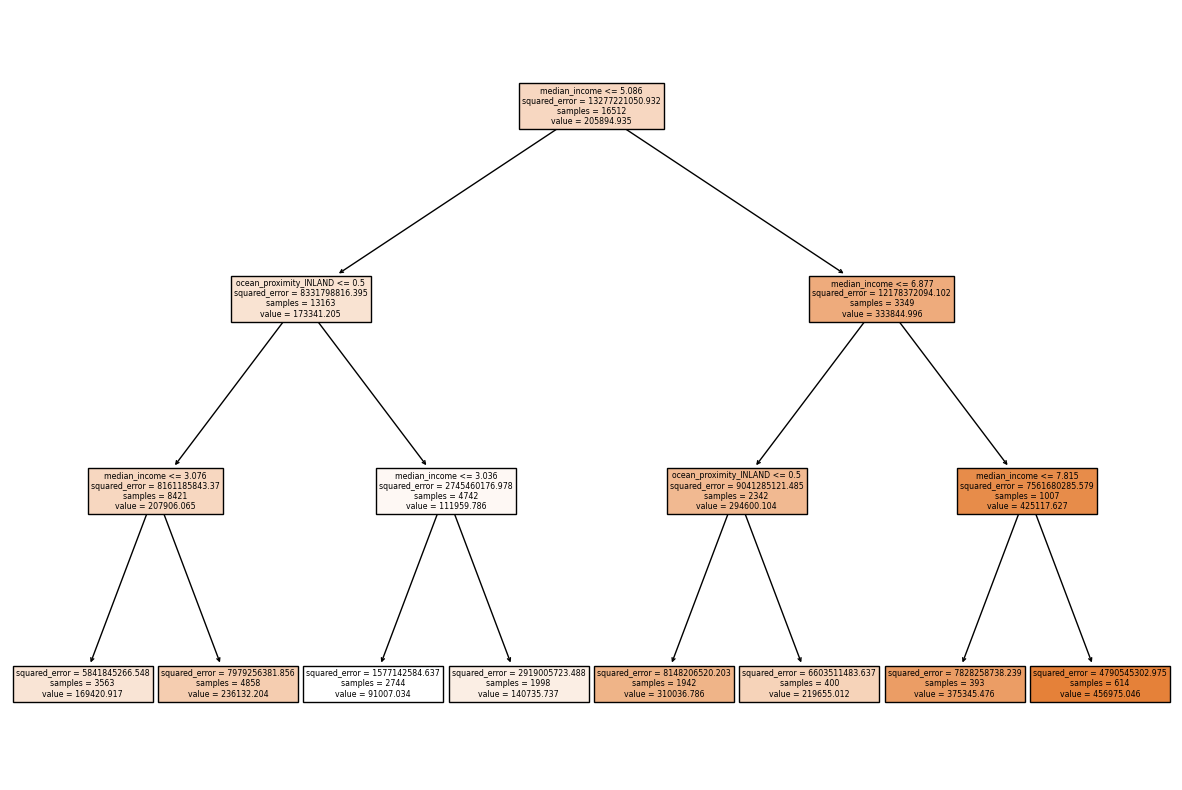

In [9]:
# Verificação se X é um DataFrame
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=[f"feature_{i}" for i in range(X_train.shape[1])])

# Melhor árvore:
best_clf = regr_1 

# Visualizando a melhor árvore
plt.figure(figsize=(15, 10))
tree.plot_tree(best_clf, feature_names=X_train.columns, filled=True)
plt.show()

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [17]:
path = regr_1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

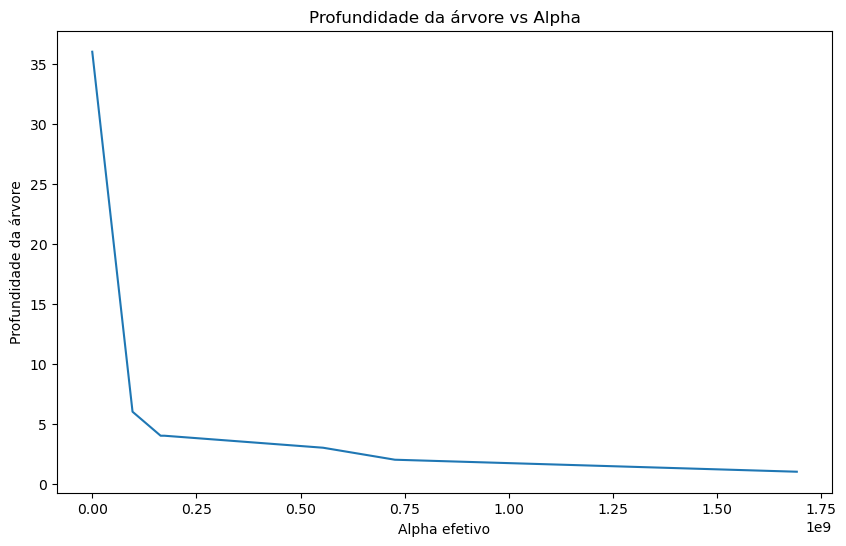

In [41]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Visualizando a profundidade das árvores
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("Alpha efetivo")
plt.ylabel("Profundidade da árvore")
plt.title("Profundidade da árvore vs Alpha")
plt.show()

### 4. Para cada árvore na lista, calcule o MSE da árvore.

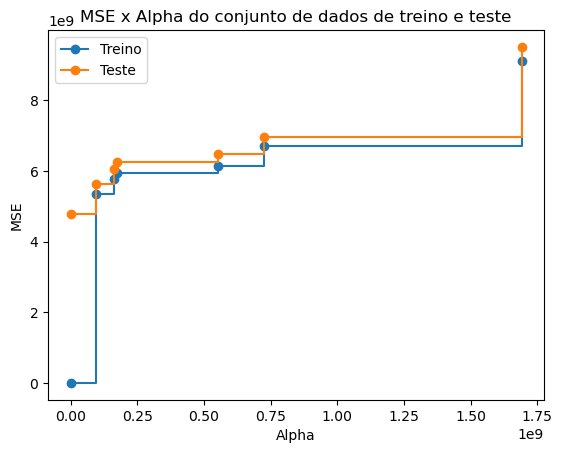

In [43]:
train_scores = [mean_squared_error(y_train, clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test, clf.predict(X_test)) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x Alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="Treino", drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="Teste", drawstyle="steps-post")
ax.legend()
plt.show()

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

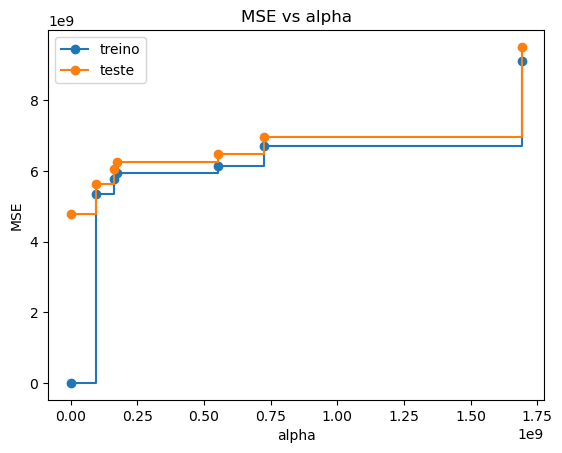

In [45]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE vs alpha")
ax.plot(ccp_alphas[:-1], mse_train[:-1], marker='o', label="treino", drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], mse_test[:-1], marker='o', label="teste", drawstyle="steps-post")
ax.legend()
plt.show()


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [56]:
min_mse_index = mse_test.index(min(mse_test))

# Árvore com melhpr alpha
best_clf = clfs[min_mse_index]

# Calcular o R-quadrado
r2 = best_clf.score(X_test, y_test)
print(f"O R-quadrado da melhor árvore é: {r2:.2f}".replace(".",","))

O R-quadrado da melhor árvore é: 0,64


### 7. Visualize esta árvore.

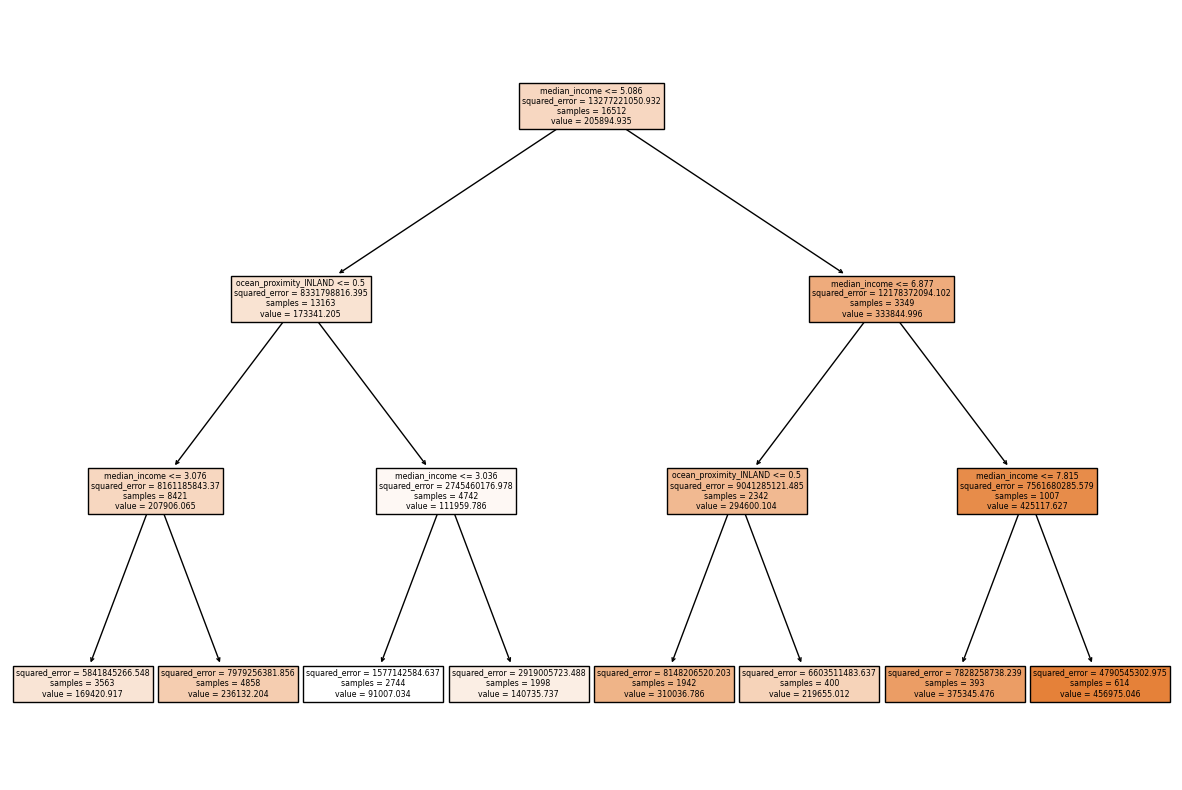

In [58]:
# Árvore em 3 quebras
best_clf = DecisionTreeRegressor(max_depth=3)
best_clf.fit(X_train, y_train)

# Visualizando a melhor árvore
plt.figure(figsize=(15, 10))
tree.plot_tree(best_clf, feature_names=X_train.columns, filled=True)
plt.show()